In [1]:
#FASHION MNIST PRACTISE2
#preloaded

In [1]:
#IMPORT STUFF

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras


In [2]:
#load the dataset
dataset = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = dataset.load_data()

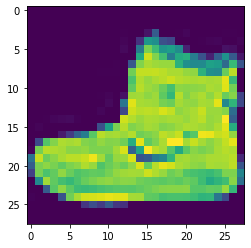

In [3]:
plt.imshow(x_train[0])

In [4]:
labels=['Trouser','Pullover','Dress','Coat','Snadal','Shirt','Snealer']

In [5]:
labels

['Trouser', 'Pullover', 'Dress', 'Coat', 'Snadal', 'Shirt', 'Snealer']

In [6]:
#normLize data
x_train=x_train/255
x_test=x_test/255

In [7]:
#reshape data
x_train=np.expand_dims(x_train,-1)

In [8]:
x_train.ndim

4

In [9]:
x_test=np.expand_dims(x_test,-1)

In [10]:
x_test.ndim

4

In [11]:
#TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train,x_validate,y_train,y_valdiate = train_test_split(x_train,y_train)

In [12]:
#prpare the model

model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=2,strides=(2,2),padding='valid',input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=1,strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.12),
    keras.layers.Dense(32,activation='softmax'),
                        
])
#2D (())
#(28,28,1)
#softmax
#filters,kernelsize,strides

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,batch_size=100,validation_data=(x_validate,y_valdiate),epochs=10)
#batch_size
#validation_data=() || (not validation_split=(0.2))

Epoch 1/10
450/450 [==============================] - 16s 31ms/step - loss: 1.0262 - accuracy: 0.6204 - val_loss: 0.5935 - val_accuracy: 0.7764
Epoch 2/10
450/450 [==============================] - 15s 33ms/step - loss: 0.5852 - accuracy: 0.7793 - val_loss: 0.5026 - val_accuracy: 0.8180
Epoch 3/10
450/450 [==============================] - 14s 32ms/step - loss: 0.5172 - accuracy: 0.8067 - val_loss: 0.4646 - val_accuracy: 0.8271
Epoch 4/10
450/450 [==============================] - 15s 33ms/step - loss: 0.4795 - accuracy: 0.8221 - val_loss: 0.4434 - val_accuracy: 0.8360
Epoch 5/10
450/450 [==============================] - 15s 34ms/step - loss: 0.4530 - accuracy: 0.8318 - val_loss: 0.4238 - val_accuracy: 0.8461
Epoch 6/10
450/450 [==============================] - 14s 31ms/step - loss: 0.4337 - accuracy: 0.8390 - val_loss: 0.4129 - val_accuracy: 0.8467
Epoch 7/10
450/450 [==============================] - 16s 36ms/step - loss: 0.4150 - accuracy: 0.8462 - val_loss: 0.3904 - val_accuracy:

In [15]:
#model evaluate
model.evaluate(x_test,y_test)


313/313 [==============================] - 2s 6ms/step - loss: 0.3838 - accuracy: 0.8579


[0.3837578296661377, 0.8579000234603882]

In [16]:
#model prediction
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


313/313 [==============================] - 2s 6ms/step
class is 7


IndexError: Replacement index 1 out of range for positional args tuple

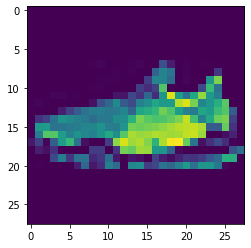

In [20]:
import random

r = random.randint(0,100)
plt.imshow(x_test[r])
ans = model.predict(x_test)
print('class is',np.argmax(ans[r]))
plt.title('{} / {}'.format(labels[y_train[r]]),y_train[r])



array([[1.0149089e-07, 6.3349415e-07, 6.0339520e-09, ..., 2.6946914e-10,
        3.0641736e-10, 5.4840448e-11],
       [2.0293437e-03, 2.2042659e-06, 9.8975873e-01, ..., 7.5680705e-13,
        2.0743535e-13, 2.1974282e-13],
       [3.2181635e-09, 9.9999988e-01, 2.7000659e-08, ..., 2.5584899e-18,
        2.2338700e-19, 3.2347984e-20],
       ...,
       [1.5237117e-04, 5.5017023e-07, 4.5968113e-06, ..., 1.0564056e-12,
        4.0253188e-13, 7.2543891e-13],
       [1.4664482e-06, 9.9984407e-01, 5.4980956e-07, ..., 1.5277429e-13,
        2.1695834e-14, 3.1578616e-15],
       [3.4316664e-04, 1.6388340e-05, 3.9698672e-04, ..., 2.7926839e-07,
        1.4760531e-07, 1.1666713e-07]], dtype=float32)

Text(0.5, 1.0, 'Coat / 3')

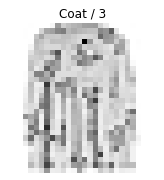

In [89]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j)
j+=1
plt.imshow(x_train[i],cmap="Greys")
plt.axis('off')
plt.title('{} / {}'.format(labels[y_train[i]], y_train[i]))